In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../pool_data_202211111622.csv')

In [3]:
df.head()

,pool_id,time_stamp,salinity,flow switch,flow meter,turbidity,ORP,PH,TDS,Pressure in tank,...,Shw msg,Drain,Human Counter,temperature,water level,cppm,phfeedtime,orpfeedtime,bather in from mens,bather in from ladies
0,10001,2022-11-01 11:01:16.220 -0400,287.175,NaN,NaN,9.51440,774.049,7.41573,287.175,NaN,...,NaN,0.0,0.0,74.2574,500.0,NaN,NaN,NaN,NaN,NaN
1,10001,2022-11-01 11:01:26.323 -0400,287.175,NaN,NaN,9.35767,773.597,7.41573,287.175,NaN,...,NaN,0.0,0.0,74.2574,500.0,NaN,NaN,NaN,NaN,NaN
2,10001,2022-11-01 11:01:36.386 -0400,287.121,NaN,NaN,9.35767,773.869,7.41889,287.121,NaN,...,NaN,0.0,0.0,74.2574,500.0,NaN,NaN,NaN,NaN,NaN
3,10001,2022-11-01 11:01:46.498 -0400,287.248,NaN,NaN,8.57397,773.959,7.41193,287.248,NaN,...,NaN,0.0,0.0,74.2574,500.0,NaN,NaN,NaN,NaN,NaN
4,10001,2022-11-01 11:01:56.554 -0400,287.175,NaN,NaN,8.88745,773.597,7.41699,287.157,NaN,...,NaN,0.0,0.0,74.2574,500.0,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43635 entries, 0 to 43634
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   pool_id                43635 non-null  int64  
 1   time_stamp             43635 non-null  object 
 2   salinity               43604 non-null  float64
 3   flow switch            31 non-null     float64
 4   flow meter             0 non-null      float64
 5   turbidity              43604 non-null  float64
 6   ORP                    43635 non-null  float64
 7   PH                     43635 non-null  float64
 8   TDS                    43604 non-null  float64
 9   Pressure in tank       0 non-null      float64
 10  Pressure in            43604 non-null  float64
 11  Pressure out           43604 non-null  float64
 12  Pump RPM               0 non-null      float64
 13  pump current           43604 non-null  float64
 14  dis_feeder             0 non-null      float64
 15  ph

In [5]:
# We got some empty columns, lets just drop those

df = df.dropna(axis=1, how='all')

In [6]:
# for now, we only have one pool id

df = df.drop('pool_id', axis=1)

In [7]:
df.head()

,time_stamp,salinity,flow switch,turbidity,ORP,PH,TDS,Pressure in,Pressure out,pump current,Fresh water,Drain,Human Counter,temperature,water level,cppm
0,2022-11-01 11:01:16.220 -0400,287.175,NaN,9.51440,774.049,7.41573,287.175,2.53581,2.53346,0.0,0.0,0.0,0.0,74.2574,500.0,NaN
1,2022-11-01 11:01:26.323 -0400,287.175,NaN,9.35767,773.597,7.41573,287.175,2.53508,2.53382,0.0,0.0,0.0,0.0,74.2574,500.0,NaN
2,2022-11-01 11:01:36.386 -0400,287.121,NaN,9.35767,773.869,7.41889,287.121,2.53526,2.53382,0.0,0.0,0.0,0.0,74.2574,500.0,NaN
3,2022-11-01 11:01:46.498 -0400,287.248,NaN,8.57397,773.959,7.41193,287.248,2.53545,2.53382,0.0,0.0,0.0,0.0,74.2574,500.0,NaN
4,2022-11-01 11:01:56.554 -0400,287.175,NaN,8.88745,773.597,7.41699,287.157,2.53508,2.53382,0.0,0.0,0.0,0.0,74.2574,500.0,NaN


In [8]:
# Lets set time_stamp as our index
df = df.set_index('time_stamp')
df.head(3)

,salinity,flow switch,turbidity,ORP,PH,TDS,Pressure in,Pressure out,pump current,Fresh water,Drain,Human Counter,temperature,water level,cppm
time_stamp,,,,,,,,,,,,,,,
2022-11-01 11:01:16.220 -0400,287.175,NaN,9.51440,774.049,7.41573,287.175,2.53581,2.53346,0.0,0.0,0.0,0.0,74.2574,500.0,NaN
2022-11-01 11:01:26.323 -0400,287.175,NaN,9.35767,773.597,7.41573,287.175,2.53508,2.53382,0.0,0.0,0.0,0.0,74.2574,500.0,NaN
2022-11-01 11:01:36.386 -0400,287.121,NaN,9.35767,773.869,7.41889,287.121,2.53526,2.53382,0.0,0.0,0.0,0.0,74.2574,500.0,NaN


In [14]:
# lets plot everything over time
df.plot(subplots = True, grid = True, sharex=False,\
       layout = (int(len(df)/3+1),3), figsize = (20,50));

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000002A0AD1DFEE0> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000002A0AD1DFD30> (for post_execute):



KeyboardInterrupt



<AxesSubplot:xlabel='time_stamp', ylabel='salinity'>

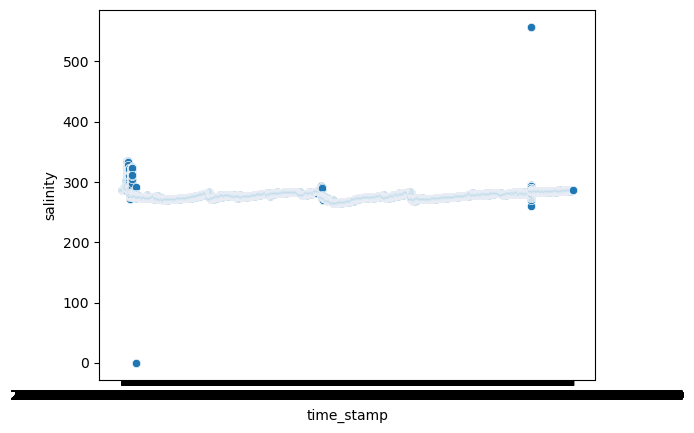

In [13]:
sns.scatterplot(x=df.index, y=df['salinity'])

In [26]:
# Maybe lets explore in a single day 

df.index = pd.to_datetime(df.index, utc=True)

In [29]:
one_day = df.loc['2022-11-01']
one_day.head()

,salinity,flow switch,turbidity,ORP,PH,TDS,Pressure in,Pressure out,pump current,Fresh water,Drain,Human Counter,temperature,water level,cppm
time_stamp,,,,,,,,,,,,,,,
2022-11-01 15:01:16.220000+00:00,287.175,NaN,9.51440,774.049,7.41573,287.175,2.53581,2.53346,0.0,0.0,0.0,0.0,74.2574,500.0,NaN
2022-11-01 15:01:26.323000+00:00,287.175,NaN,9.35767,773.597,7.41573,287.175,2.53508,2.53382,0.0,0.0,0.0,0.0,74.2574,500.0,NaN
2022-11-01 15:01:36.386000+00:00,287.121,NaN,9.35767,773.869,7.41889,287.121,2.53526,2.53382,0.0,0.0,0.0,0.0,74.2574,500.0,NaN
2022-11-01 15:01:46.498000+00:00,287.248,NaN,8.57397,773.959,7.41193,287.248,2.53545,2.53382,0.0,0.0,0.0,0.0,74.2574,500.0,NaN
2022-11-01 15:01:56.554000+00:00,287.175,NaN,8.88745,773.597,7.41699,287.157,2.53508,2.53382,0.0,0.0,0.0,0.0,74.2574,500.0,NaN


<AxesSubplot:xlabel='time_stamp', ylabel='salinity'>

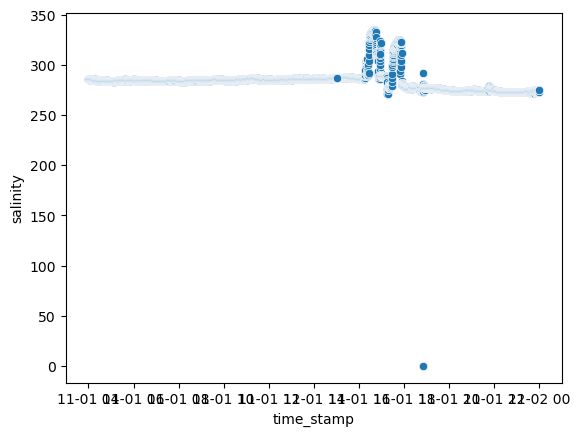

In [36]:
sns.scatterplot(x=one_day.index, y=one_day['salinity'])

What is going on here with Salinity?

<AxesSubplot:xlabel='time_stamp', ylabel='salinity'>

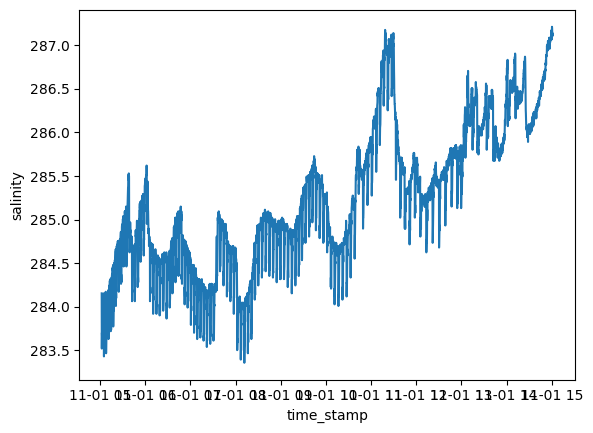

In [38]:
sns.lineplot(x=one_day.index[int(len(one_day)/2):], y=one_day['salinity'][int(len(one_day)/2):])

Some thoughts, maybe we can try to look at the relationships between measures.